資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
(x_train_image, y_train_label), (x_test_image, y_test_label)=mnist.load_data()

In [3]:
x_train=x_train_image.reshape(60000,784).astype('float32')
x_test=x_test_image.reshape(10000,784).astype('float32')

In [4]:
x_train_normalize=x_train/255
x_test_normalize=x_test/255

In [5]:
y_train_onehot=np_utils.to_categorical(y_train_label)
y_test_onehot=np_utils.to_categorical(y_test_label)

建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [7]:
model=Sequential()

In [8]:
model.add(Dense(units=1000, input_dim=784, kernel_initializer='normal', activation='relu'))

In [9]:
model.add(Dropout(0.5))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

In [11]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


訓練模型

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
train_history=model.fit(x=x_train_normalize, y=y_train_onehot, validation_split=0.2, epochs=10, batch_size=200, verbose=2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 48000 samples, validate on 12000 samples
Epoch 1/10





 - 6s - loss: 0.3623 - acc: 0.8910 - val_loss: 0.1671 - val_acc: 0.9521
Epoch 2/10
 - 7s - loss: 0.1610 - acc: 0.9522 - val_loss: 0.1205 - val_acc: 0.9645
Epoch 3/10
 - 3s - loss: 0.1175 - acc: 0.9654 - val_loss: 0.0970 - val_acc: 0.9708
Epoch 4/10
 - 3s - loss: 0.0913 - acc: 0.9728 - val_loss: 0.0908 - val_acc: 0.9727
Epoch 5/10
 - 3s - loss: 0.0746 - acc: 0.9778 - val_loss: 0.0798 - val_acc: 0.9751
Epoch 6/10
 - 3s - loss: 0.0645 - acc: 0.9805 - val_loss: 0.0775 - val_acc: 0.9763
Epoch 7/10
 - 3s - loss: 0.0548 - acc: 0.9830 - val_loss: 0.0730 - val_acc: 0.9782
Epoch 8/10
 - 3s - loss: 0.0473 - acc: 0.9859 - val_loss: 0.0713 - val_acc: 0.9790
Epoch 9/10
 - 3s - loss: 0.0423 - acc: 0.9868 - val_loss: 0.0682 - val_acc: 0.9800
Epoch 10/10
 - 3s - loss: 0.0365 - acc: 0.9883 - val_loss: 0.0631 - val_acc: 0.9807


以圖形顯示訓練過程

In [14]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

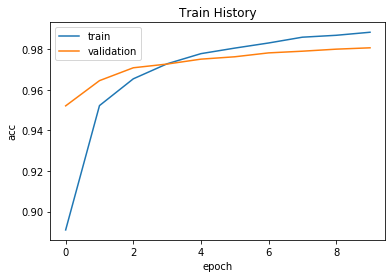

In [15]:
show_train_history(train_history, 'acc', 'val_acc')

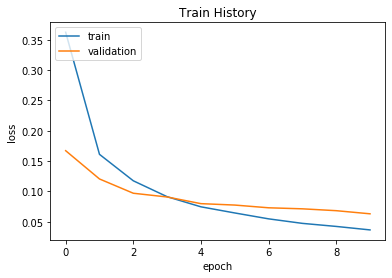

In [16]:
show_train_history(train_history,'loss', 'val_loss')

評估模型準確率